In [16]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

In [2]:
# Model Parameters
INPUT_SHAPE = (224, 224, 3)  # MobileNetV2 input shape
NUM_CLASSES = 2  # "with_mask" and "without_mask"
LEARNING_RATE = 0.001
DROPOUT_RATE = 0.3
BATCH_SIZE = 32
EPOCHS = 20

In [8]:
# Paths to processed dataset directories
TRAIN_DIR = '../../dataset/processed_dataset/MobileNet-SSD/train'
VALIDATION_DIR = '../../dataset/processed_dataset/MobileNet-SSD/validation'
TEST_DIR = '../../dataset/processed_dataset/MobileNet-SSD/test'

In [9]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_generator = val_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 596 images belonging to 2 classes.
Found 85 images belonging to 2 classes.
Found 172 images belonging to 2 classes.


In [10]:
# Build the MobileNet-SSD Model
def build_mobilenet_ssd(input_shape, num_classes, dropout_rate):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model

    # Add SSD Head
    x = Flatten()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(num_classes, activation='softmax')(x)  # Classification output

    model = Model(inputs=base_model.input, outputs=output)
    return model

In [11]:
# Compile the Model
model = build_mobilenet_ssd(INPUT_SHAPE, NUM_CLASSES, DROPOUT_RATE)
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2024-11-16 13:46:31.983087: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=val_generator.samples // BATCH_SIZE
)

/home/gizachew/miniconda3/envs/image_and_speech/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8741 - loss: 3.9413 - val_accuracy: 0.9688 - val_loss: 0.3065
Epoch 2/20
 1/18 ━━━━━━━━━━━━━━━━━━━━ 16s 950ms/step - accuracy: 0.8750 - loss: 1.6228

2024-11-16 13:47:17.531445: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/gizachew/miniconda3/envs/image_and_speech/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8750 - loss: 1.6228 - val_accuracy: 0.9524 - val_loss: 0.0472
Epoch 3/20


2024-11-16 13:47:18.272998: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9424 - loss: 0.7888 - val_accuracy: 0.9844 - val_loss: 0.1442
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9688 - loss: 0.4209 - val_accuracy: 1.0000 - val_loss: 2.8383e-08
Epoch 5/20


2024-11-16 13:47:40.796606: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9468 - loss: 0.4381 - val_accuracy: 0.9844 - val_loss: 0.0728
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9062 - loss: 0.2940 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9777 - loss: 0.1727 - val_accuracy: 0.9844 - val_loss: 0.0785
Epoch 8/20
 1/18 ━━━━━━━━━━━━━━━━━━━━ 16s 955ms/step - accuracy: 0.8750 - loss: 0.3169

2024-11-16 13:48:28.401566: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8750 - loss: 0.3169 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9522 - loss: 0.1623 - val_accuracy: 0.9844 - val_loss: 0.0804
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 1.0000 - val_loss: 0.0116
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9750 - loss: 0.0925 - val_accuracy: 0.9688 - val_loss: 0.0543
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 1.0000 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 0.0275
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9633 - loss: 0.1035 - val_accuracy: 0.9844 - val_loss: 0.0321
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9688 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 0.0517
Epoch 15/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.9853 - loss: 0.0558 - val_accuracy: 0.9688 - val_loss:

2024-11-16 13:50:37.996240: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9740 - loss: 0.0998 - val_accuracy: 0.9844 - val_loss: 0.0614
Epoch 18/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0276 - val_accuracy: 1.0000 - val_loss: 0.0610
Epoch 19/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9820 - loss: 0.0594 - val_accuracy: 0.9375 - val_loss: 0.1264
Epoch 20/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9688 - loss: 0.0867 - val_accuracy: 0.9524 - val_loss: 0.0808


In [13]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 797ms/step - accuracy: 0.9271 - loss: 0.2414
Test Loss: 0.2149
Test Accuracy: 0.9244


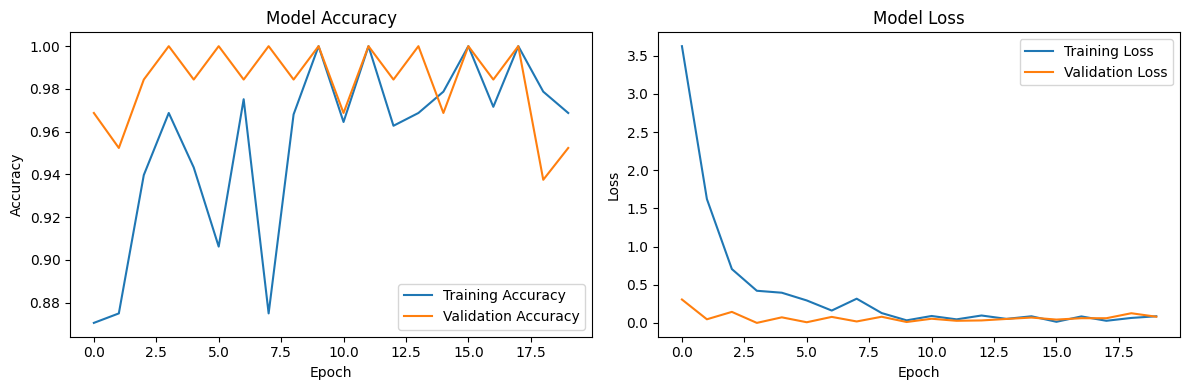

In [14]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  


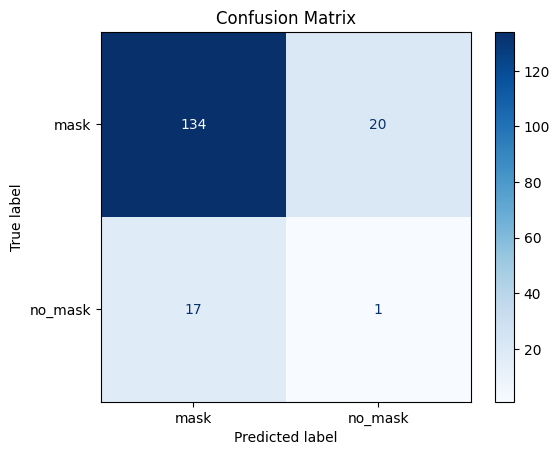

In [15]:
# Get true labels and predictions from the test generator
test_generator.reset()  # Ensure the generator starts from the first batch
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices
true_classes = test_generator.classes  # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class names

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', values_format='d')  # 'd' for integer format
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

        mask       0.89      0.87      0.88       154
     no_mask       0.05      0.06      0.05        18

    accuracy                           0.78       172
   macro avg       0.47      0.46      0.46       172
weighted avg       0.80      0.78      0.79       172

